In [1]:
import sys
sys.path.insert(0, "..")
import utils
import numpy as np

# read and process dataset
data = utils.load_dataset("../data/mit_Uferuebergang/all_data_edit.txt")
print("dataset length=%s" % len(data))

dataset length=274047


## Datensatzgröße vs. Modelperformance
* **Versuchsaufbau**
    * In 30 Schritten wird das KNN auf jeweils 200,...,3000 Samples aus dem Datensatz trainiert. 
    * Die Genauigkeit von dem Netzwerk wird auf dem kompletten Datensatz evaluiert.
    * Um Ausreißer zu vermeiden, wird die Größe des Datensatzes so erweitert, dass der letzte Datensatz mit jeweils 100 "neuen" Beispieldaten fusioniert wird.
    * Außerdem wird nicht nur auf einem, sondern 10 verschiedenen KNNs trainiert, die in jeder Iteration zufällig neu generiert werden.
    * Die Anzahl der Epochen ist in jeder Iteration und für jedes Modell konstant. 
* **Ergebnisse**
    * Ab einer Datensatzgröße von etwa 1000 Samples kann eine sehr hohe Genauigkeit verzeichnet werden. Die ist aber auch abhängig von den gewählten Samples.
    * Der Mittelwert verschiedener Modelle scheint sich bis zu einer Datensatzgröße von 3000 relativ linear dem Optimum anzunähren.
    * Die Worst-Case-Performance beträgt ab einer Datensatzgröße von 1500 eine Genauigkeit von mindestens 60%. 

In [2]:
divisions,step,modelcount = 15,200,10
test = data.sample(50000)
data_complete = utils.WaveFormDataset(test)[:]
accuracies = []
best_accuracy, best_model = None, None

for i in range(divisions):

    samplecount = (i+1)*step
    model_accuracies = []
    train = utils.WaveFormDataset(test[:samplecount])
    
    for idx in range(modelcount):
        model = utils.ConvNet()
        trainer = utils.Trainer(model, epochs=30, batch_size=128)
        trainer.set_dataset(train, ptrain=1)
        
        for epoch in trainer.train():
            pass
        
        _, correct = trainer.evaluate(data_complete)
        accuracy = correct / data_complete["label"].size(0)
        model_accuracies.append(accuracy)
        
        if best_accuracy is None or accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy
        
    print("p={:.3f}, #samples={}, mean accuracy={:.3f}".format(
        (i+1)/divisions, 
        samplecount,
        np.mean(model_accuracies)))
    
    accuracies.append(model_accuracies)

p=0.067, #samples=200, mean accuracy=0.500
p=0.133, #samples=400, mean accuracy=0.515
p=0.200, #samples=600, mean accuracy=0.492
p=0.267, #samples=800, mean accuracy=0.592
p=0.333, #samples=1000, mean accuracy=0.631
p=0.400, #samples=1200, mean accuracy=0.681
p=0.467, #samples=1400, mean accuracy=0.722
p=0.533, #samples=1600, mean accuracy=0.686
p=0.600, #samples=1800, mean accuracy=0.692
p=0.667, #samples=2000, mean accuracy=0.741
p=0.733, #samples=2200, mean accuracy=0.727
p=0.800, #samples=2400, mean accuracy=0.824
p=0.867, #samples=2600, mean accuracy=0.824
p=0.933, #samples=2800, mean accuracy=0.812
p=1.000, #samples=3000, mean accuracy=0.885


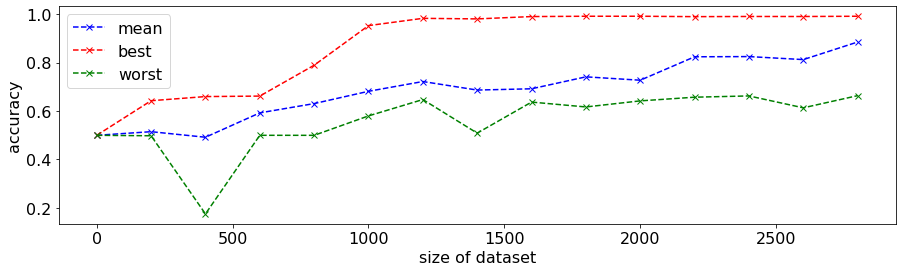

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})
xs = np.arange(divisions)*step
accuracies = np.array(accuracies)
fig,ax = plt.subplots(figsize=(15,4))
ax.plot(xs,np.mean(accuracies, axis=1), "x--b", label="mean")
ax.plot(xs,np.max(accuracies, axis=1), "x--r", label="best")
ax.plot(xs,np.min(accuracies, axis=1), "x--g", label="worst")
ax.set_xlabel("size of dataset")
ax.set_ylabel("accuracy")
ax.legend()

In [4]:
wf =  utils.WaveFormDataset(data)[:]["waveform"].unsqueeze(1)
predicted = model.predict(wf)

## Visualisierung
* Bestes Modell mit Wahrscheinlichkeitsausgabe und mit angegebenen Label.

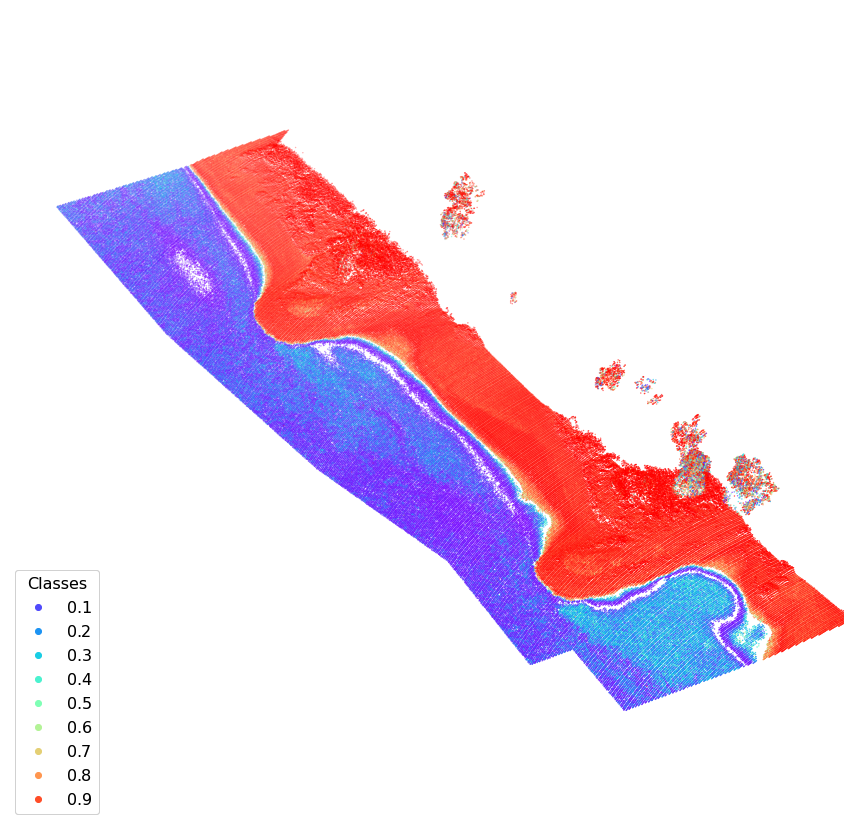

In [5]:
data_val_with_prediction = data.assign(prediction = predicted[:,0])
# 3d-plot of the point cloud
utils.plot_pcl(data_val_with_prediction, targetcol="prediction", plotsize=15)

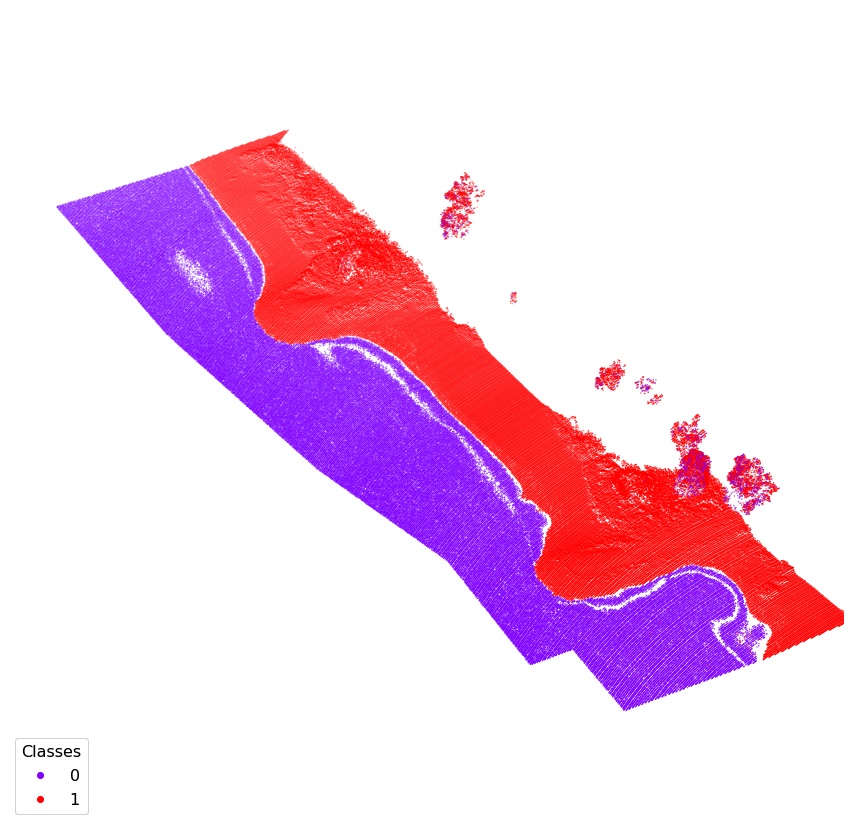

In [6]:
data_val_with_hard_prediction = data.assign(prediction = (predicted[:,0] > .5))
# 3d-plot of the point cloud
utils.plot_pcl(data_val_with_hard_prediction, targetcol="prediction", plotsize=15)